# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

In [1]:
# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

Neftalí Valdez

<a href="http://twitter.com/neftalivldz" target="_blank">@neftalivldz</a> | <a href="mailto:nvaldez@tec.mx">nvaldez@tec.mx</a>

In [23]:
#%pip install pandas_ta

In [24]:
import os#%pip install pandas_ta

os.environ["LD_LIB_CONFIG_PATH"] = "../../Configuration"

In [32]:
import lseg.data as ld
import pandas_ta as ta
import matplotlib.pyplot as plt
import numpy as np

In [6]:
ld.open_session()

<lseg.data.session.Definition object at 0x1079d3f90 {name='workspace'}>

In [17]:
from datetime import datetime, timedelta
today = datetime.today()
start_date = today - timedelta(days=(365*.5))
print(today, past)
df = ld.get_history(universe=["BIMBOA.MX"], fields=['TR.CLOSEPRICE'], interval="1D",
               start = start_date, end = today)
df = df.rename(columns = {"Close Price":"close"}) #renaming the columns of the dataset
df

2025-03-04 15:43:05.862774 2024-09-03 03:37:32.604023


BIMBOA.MX,close
Date,
2024-09-03,68.86
2024-09-04,70.88
2024-09-05,70.02
2024-09-06,69.24
2024-09-09,69.08
...,...
2025-02-26,57.49
2025-02-27,54.67
2025-02-28,55.13


In [18]:
df.dtypes

BIMBOA.MX
close    Float64
dtype: object

In [19]:
for t in [5, 21, 63]:
    print(t)

5
21
63


In [26]:
for t in [5, 21, 63]:
    df[f'SMA_{t}'] = ta.sma(df['close'],
                               length=t)

In [29]:
plt.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'svg'

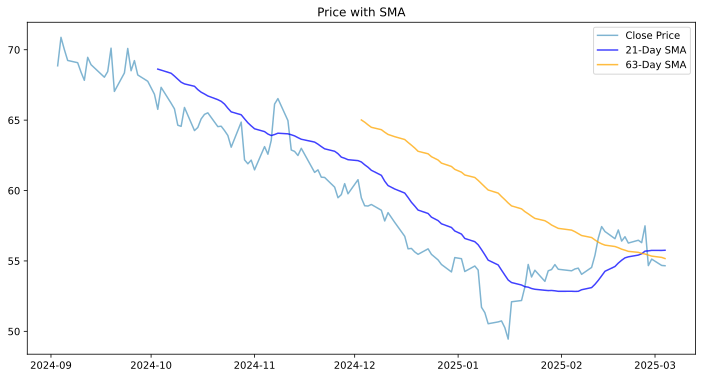

In [30]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot Closing Price and SMAs
plt.plot(df['close'], label='Close Price', alpha=0.5)
plt.plot(df['SMA_21'], label='21-Day SMA', alpha=0.75, color='blue')
plt.plot(df['SMA_63'], label='63-Day SMA', alpha=0.75, color='orange')

plt.title('Price with SMA')
plt.legend()
plt.show()

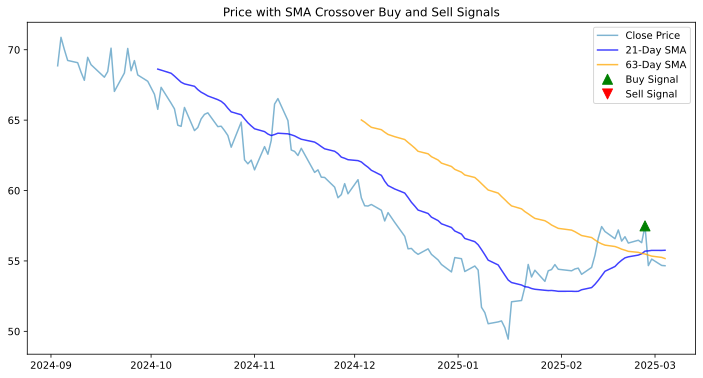

In [33]:
# Generate Buy and Sell signals
df['Buy_Signal'] = np.where((df['SMA_21'] > df['SMA_63']) & (df['SMA_21'].shift(1) <= df['SMA_63'].shift(1)), 1, 0)
df['Sell_Signal'] = np.where((df['SMA_21'] < df['SMA_63']) & (df['SMA_21'].shift(1) >= df['SMA_63'].shift(1)), -1, 0)

# Plotting
plt.figure(figsize=(12, 6))

# Plot Closing Price and SMAs
plt.plot(df['close'], label='Close Price', alpha=0.5)
plt.plot(df['SMA_21'], label='21-Day SMA', alpha=0.75, color='blue')
plt.plot(df['SMA_63'], label='63-Day SMA', alpha=0.75, color='orange')

# Plot Buy Signals
plt.plot(df[df['Buy_Signal'] == 1].index, df['close'][df['Buy_Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')

# Plot Sell Signals
plt.plot(df[df['Sell_Signal'] == -1].index, df['close'][df['Sell_Signal'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Price with SMA Crossover Buy and Sell Signals')
plt.legend()
plt.show()

In [35]:
df['position'] = np.where((df['SMA_21'] > df['SMA_63']),  
                             1,  
                             -1) 

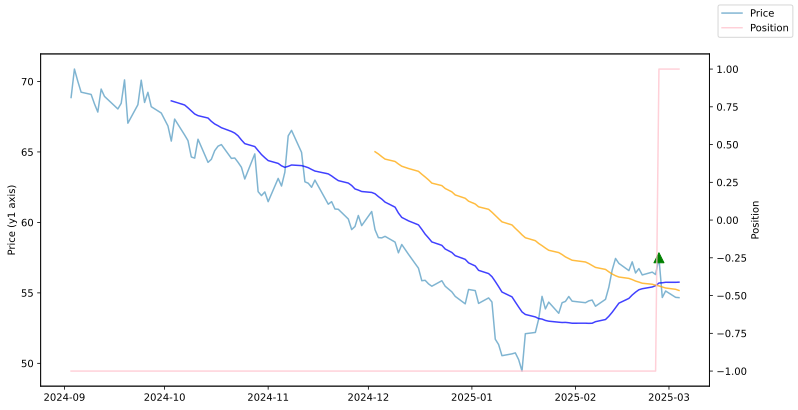

In [36]:
from matplotlib.dates import AutoDateFormatter, AutoDateLocator


fig,ax1 = plt.subplots(figsize=(12, 6))
l1, = ax1.plot(df.index, df['close'], label='Close Price', alpha=0.5) #Your Price field
ax1.set_ylabel('Price (y1 axis)')
ax1.plot(df['SMA_21'], label='21-Day SMA', alpha=0.75, color='blue')
ax1.plot(df['SMA_63'], label='63-Day SMA', alpha=0.75, color='orange')
ax1.plot(df[df['Buy_Signal'] == 1].index, df['close'][df['Buy_Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
ax1.plot(df[df['Sell_Signal'] == -1].index, df['close'][df['Sell_Signal'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')


ax2 = ax1.twinx() ##Using twinx to make ax2 as secondary axis for ax1
l2, = ax2.plot(df.index,df['position'], alpha=0.75, color='pink') #Your sales field
ax2.set_ylabel('Position')

fig.legend([l1, l2], ["Price", "Position"])

xtick_locator = AutoDateLocator()
xtick_formatter = AutoDateFormatter(xtick_locator)

ax1.xaxis.set_major_locator(xtick_locator)
ax1.xaxis.set_major_formatter(xtick_formatter)

In [37]:
df['Returns'] = np.log(df['close'] / df['close'].shift(1))
df['Strategy'] = df['position'].shift(1) * df['Returns']  
df.round(4).head()

BIMBOA.MX,close,SMA_5,SMA_21,SMA_63,Buy_Signal,Sell_Signal,position,Returns,Strategy
Date,,,,,,,,,
2024-09-03,68.86,NaN,NaN,NaN,0,0,-1,<NA>,<NA>
2024-09-04,70.88,NaN,NaN,NaN,0,0,-1,0.0289,-0.0289
2024-09-05,70.02,NaN,NaN,NaN,0,0,-1,-0.0122,0.0122
2024-09-06,69.24,NaN,NaN,NaN,0,0,-1,-0.0112,0.0112
2024-09-09,69.08,69.616,NaN,NaN,0,0,-1,-0.0023,0.0023


In [38]:
df.dropna(inplace=True)


In [39]:
np.exp(df[['Returns', 'Strategy']].sum())  


BIMBOA.MX
Returns     0.899457
Strategy    1.005019
dtype: Float64

In [40]:
df[['Returns', 'Strategy']].std() * 252 ** 0.5


BIMBOA.MX
Returns     0.249315
Strategy    0.250808
dtype: Float64

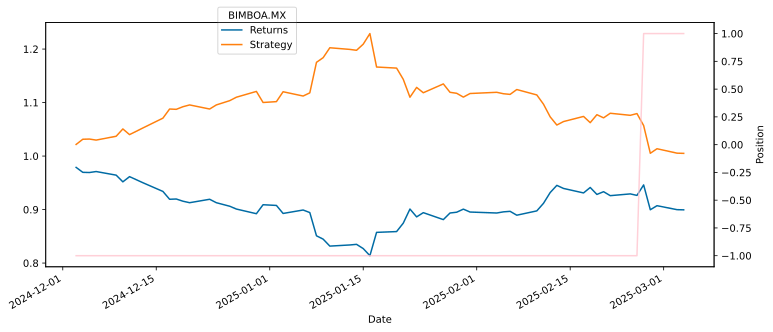

In [41]:
ax1 = df[['Returns', 'Strategy']].cumsum(
        ).apply(np.exp).plot(figsize=(12,5))

ax2 = ax1.twinx() ##Using twinx to make ax2 as secondary axis for ax1
l2, = ax2.plot(df.index,df['position'], alpha=0.75, color='pink') #Your sales field
ax2.set_ylabel('Position')

fig.legend([l1, l2], ["Price", "Position"])

xtick_locator = AutoDateLocator()
xtick_formatter = AutoDateFormatter(xtick_locator)

ax1.xaxis.set_major_locator(xtick_locator)
ax1.xaxis.set_major_formatter(xtick_formatter)

ax1.get_legend().set_bbox_to_anchor((0.25, 0.85));
# plt.savefig('../../images/ch15/strat_plot_03.png');

### Bibliography

Vahid. Using Pandas_TA To Generate Technical Indicators And Signals https://pythonology.eu/using-pandas_ta-to-generate-technical-indicators-and-signals/

Stefan Jansen. Machine learning for trading https://github.com/stefan-jansen/machine-learning-for-trading/blob/main/24_alpha_factor_library/02_common_alpha_factors.ipynb

Ives Hilpisch. Python for Finance https://github.com/yhilpisch/py4fi2nd/blob/master/code/ch15/15_trading_strategies_a.ipynb

Forecast Stock Price using RDP Historical Pricing with Facebook Prophet library https://github.com/LSEG-API-Samples/Article.RDPAPI.Python.PriceForcastUsingFBProPhet/blob/main/rdp_fbprophet.ipynb